In [23]:
import control as ct
import numpy as np
from matplotlib import pyplot as plt

In [24]:
A = np.array([[-11, -10],[1,0]])
B = np.array([[1],[0]])
C = np.array([[0,5]])
D = 0
ma = ct.ss(A,B,C,D)

In [25]:
polos = [-3+3j,-3-3j]
K = ct.acker(A,B,polos)
N = 1/(C @np.linalg.inv(B@K-A) @ B)
print(K)
print(N)

[[-5.  8.]]
[[3.6]]


In [26]:
Amf = A-B@K
Bmf = B@N
Cmf = np.block([[C],[-K]])
Dmf = np.block([[D],[N]])
mf = ct.ss(Amf,Bmf,Cmf,Dmf)
print(mf)


<LinearIOSystem>: sys[7]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (2): ['x[0]', 'x[1]']

A = [[ -6. -18.]
     [  1.   0.]]

B = [[3.6]
     [0. ]]

C = [[ 0.  5.]
     [ 5. -8.]]

D = [[0. ]
     [3.6]]



In [27]:
Tab = ct.damp(mf)

_____Eigenvalue______ Damping___ Frequency_
        -3        +3j     0.7071      4.243
        -3        -3j     0.7071      4.243


In [28]:
ct.dcgain(mf)

array([[1.],
       [2.]])

In [29]:
ct.step_info(mf)

[[{'RiseTime': 0.48842714093813083,
   'SettlingTime': 1.4187645522488563,
   'SettlingMin': 0.9022199550997989,
   'SettlingMax': 1.0432137926607123,
   'Overshoot': 4.321379266071258,
   'Undershoot': 0,
   'Peak': 1.0432137926607123,
   'PeakTime': 1.0466295877245662,
   'SteadyStateValue': 0.9999999999999998}],
 [{'RiseTime': 0.0,
   'SettlingTime': 1.6978657756420739,
   'SettlingMin': 1.8669061956251793,
   'SettlingMax': 5.080103085537336,
   'Overshoot': 154.00515427686673,
   'Undershoot': 0,
   'Peak': 5.080103085537336,
   'PeakTime': 0.1860674822621451,
   'SteadyStateValue': 2.0000000000000004}]]

In [30]:
t,y = ct.step_response(mf,5)

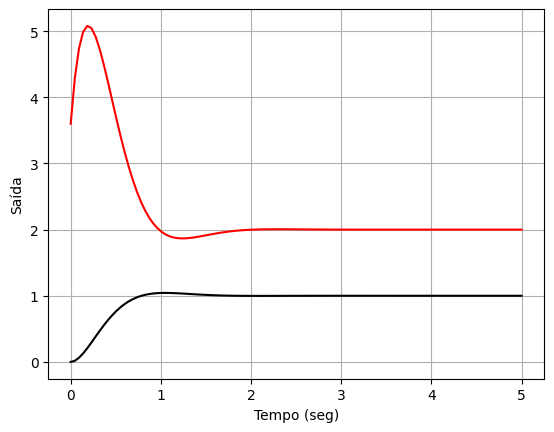

In [31]:
plt.plot(t,y[0,0,:],'k',t,y[1,0,:],'r')
plt.xlabel('Tempo (seg)')
plt.ylabel('Saída')
plt.grid()
plt.show()


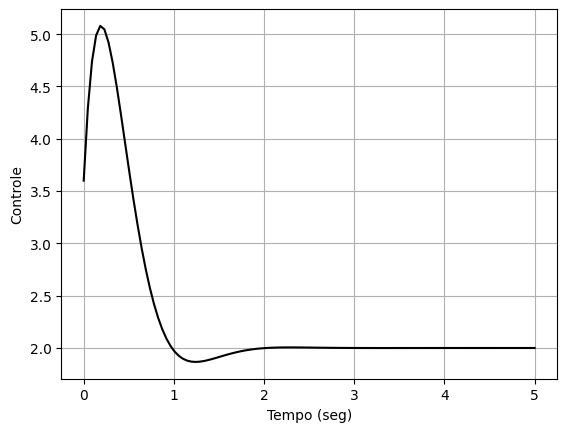

In [32]:
plt.plot(t,y[1,0,:],'k')
plt.xlabel('Tempo (seg)')
plt.ylabel('Controle')
plt.grid()
plt.show()
